In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [2]:
drivers = pd.read_csv("Licensed_Drivers.csv")
drivers = drivers.dropna(axis=1, how='all')
drivers = drivers.dropna(subset=['STATE'])
drivers['STATE'] = drivers['STATE'].str.strip(' 2/')
drivers = drivers.set_index('STATE')
drivers = drivers.loc[:'Wyoming', '2016':]
for year in range(2016, 2019):
    drivers[str(year)] = drivers[str(year)].str.replace(',', '').astype('int64', copy=False)
drivers.to_csv('drivers_by_state.csv')
drivers

,2016,2017,2018
STATE,,,
Alabama,3943082,3954378,3999057
Alaska,534585,534585,536033
Arizona,5082305,5164966,5284970
Arkansas,2391103,2417464,2145334
California,26199436,26777132,27039400
Colorado,4066580,4156138,4244713
Connecticut,2611007,2586994,2605612
Delaware,756328,770512,786504
Dist. of Col.,489831,521056,527731


In [3]:
data = pd.read_csv("preprocessed-file.csv")
states_by_year = data.groupby(['State', 'Start_Time_Year'])['Start_Time_Year'].count()

In [4]:
csv = 'State,2016,2017,2018,2019'
for key, value in states_by_year.items():
    if 2016 in key:
        csv += f"\n{key[0]},{value}"
    elif 2015 not in key:
        csv += f",{value}"
csv = StringIO(csv)
states_by_year = pd.read_csv(csv)
states_by_year = states_by_year.set_index('State')
states_by_year

,2016,2017,2018,2019
State,,,,
1.0,129,2760,13277,4717
3.0,2704,11971,22173,5591
4.0,24,121,529,218
5.0,135609,146794,150277,33368
6.0,1279,6925,13792,4172
7.0,4123,6651,6312,1352
8.0,276,888,1617,310
9.0,35356,57959,62131,13673
10.0,12648,21282,23662,6550


In [5]:
us_state_name = {
    1:'Alabama',
    2:'Alaska',
    3:'Arizona',
    4:'Arkansas',
    5:'California',
    6:'Colorado',
    7:'Connecticut',
    8:'Delaware',
    9:'Florida',
    10:'Georgia',
    11:'Hawaii',
    12:'Idaho',
    13:'Illinois',
    14:'Indiana',
    15:'Iowa',
    16:'Kansas',
    17:'Kentucky',
    18:'Louisiana',
    19:'Maine',
    20:'Maryland',
    21:'Massachusetts',
    22:'Michigan',
    23:'Minnesota',
    24:'Mississippi',
    25:'Missouri',
    26:'Montana',
    27:'Nebraska',
    28:'Nevada',
    29:'New Hampshire',
    30:'New Jersey',
    31:'New Mexico',
    32:'New York',
    33:'North Carolina',
    34:'North Dakota',
    35:'Ohio',
    36:'Oklahoma',
    37:'Oregon',
    38:'Pennsylvania',
    39:'Rhode Island',
    40:'South Carolina',
    41:'South Dakota',
    42:'Tennessee',
    43:'Texas',
    44:'Utah',
    45:'Vermont',
    46:'Virginia',
    47:'Washington',
    48:'West Virginia',
    49:'Wisconsin',
    50:'Wyoming',
}

us_state_abbrev = {
    'Alabama':'AL',
    'Alaska':'AK',
    'Arizona':'AZ',
    'Arkansas':'AR',
    'California':'CA',
    'Colorado':'CO',
    'Connecticut':'CT',
    'Delaware':'DE',
    'Florida':'FL',
    'Georgia':'GA',
    'Hawaii':'HI',
    'Idaho':'ID',
    'Illinois':'IL',
    'Indiana':'IN',
    'Iowa':'IA',
    'Kansas':'KS',
    'Kentucky':'KY',
    'Louisiana':'LA',
    'Maine':'ME',
    'Maryland':'MD',
    'Massachusetts':'MA',
    'Michigan':'MI',
    'Minnesota':'MN',
    'Mississippi':'MS',
    'Missouri':'MO',
    'Montana':'MT',
    'Nebraska':'NE',
    'Nevada':'NV',
    'New Hampshire':'NH',
    'New Jersey':'NJ',
    'New Mexico':'NM',
    'New York':'NY',
    'North Carolina':'NC',
    'North Dakota':'ND',
    'Ohio':'OH',
    'Oklahoma':'OK',
    'Oregon':'OR',
    'Pennsylvania':'PA',
    'Rhode Island':'RI',
    'South Carolina':'SC',
    'South Dakota':'SD',
    'Tennessee':'TN',
    'Texas':'TX',
    'Utah':'UT',
    'Vermont':'VT',
    'Virginia':'VA',
    'Washington':'WA',
    'West Virginia':'WV',
    'Wisconsin':'WI',
    'Wyoming':'WY',

}

In [6]:
states_by_year = states_by_year.rename(mapper=us_state_name)
states_by_year = states_by_year.rename(mapper=us_state_abbrev)
drivers = drivers.rename(mapper=us_state_abbrev)

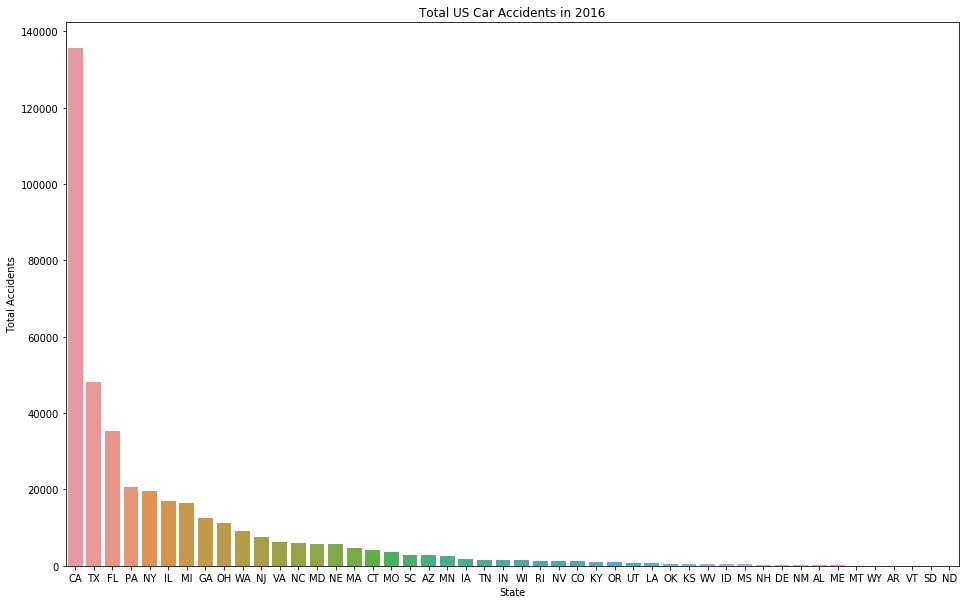

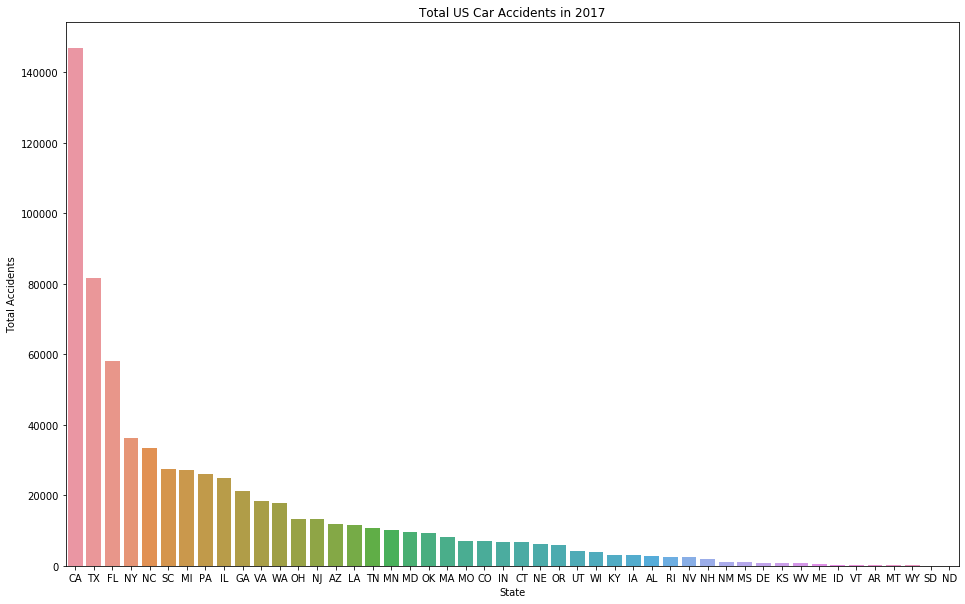

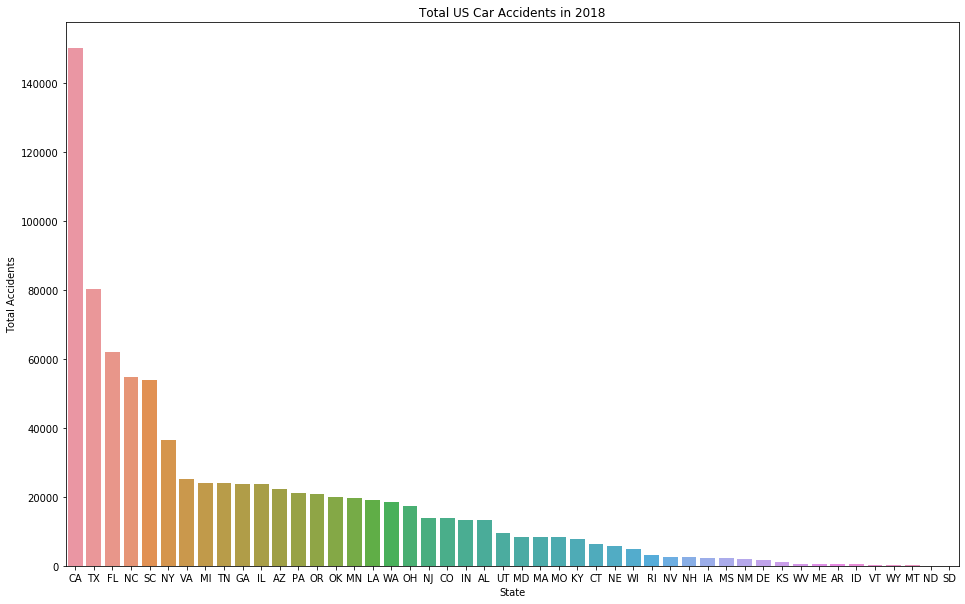

In [9]:
states = states_by_year.index.unique()
graph_values = {}
for year in range(2016, 2019):
    year = str(year)
    for state in states:
        accidents = states_by_year.loc[state, year]
        graph_values[state] = accidents
    graph_df = pd.DataFrame(list(graph_values.items()))
    graph_df.columns = ['State', 'Accidents']
    graph_df = graph_df.sort_values('Accidents', ascending=False)
    graph_df

    plt.figure(figsize=(16,10))
    graph = sns.barplot(x='State', y='Accidents', data=graph_df, order=graph_df['State'])
    graph.set(ylabel='Total Accidents')
    graph.set_title(f"Total US Car Accidents in {year}")
    graph = graph.get_figure()
    graph.savefig(f'./figures/accidents_{year}.png')

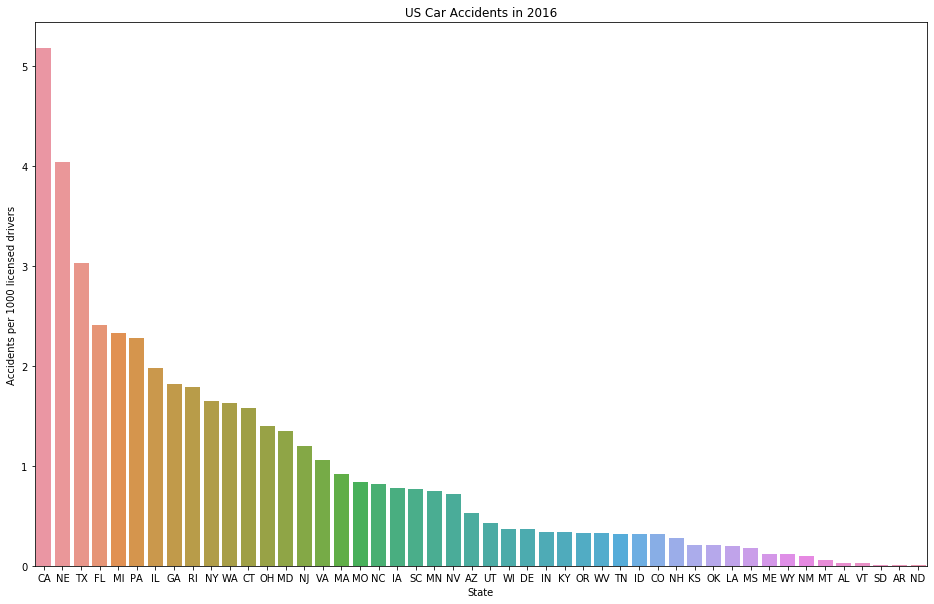

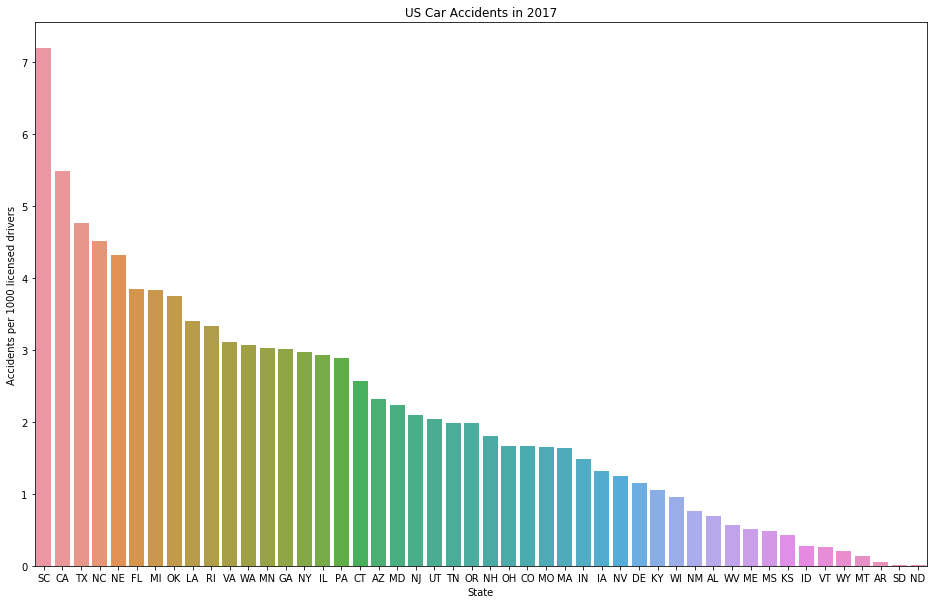

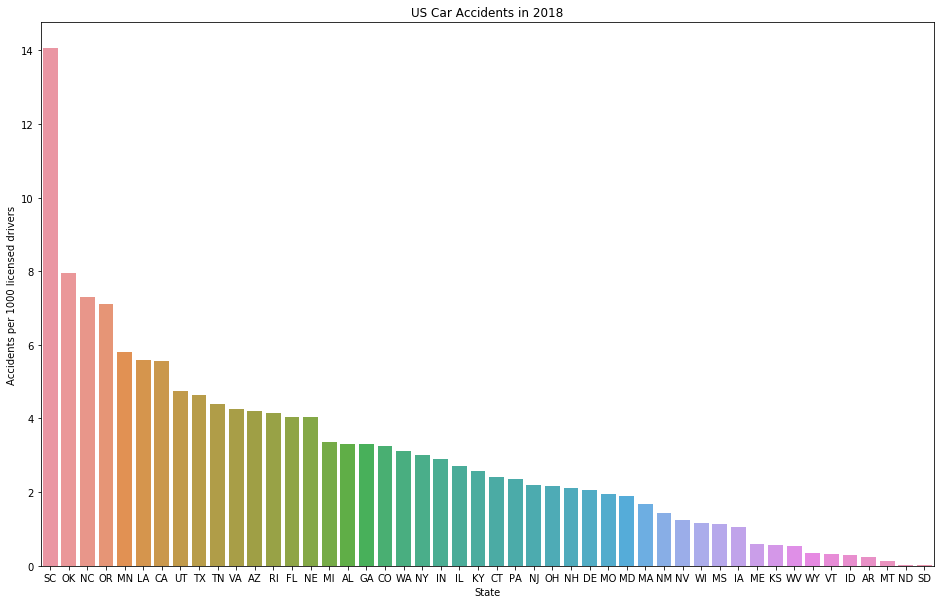

In [8]:
states = states_by_year.index.unique()
graph_values = {}
for year in range(2016, 2019):
    year = str(year)
    for state in states:
        ratio = states_by_year.loc[state, year] / drivers.loc[state, year] * 1000
        graph_values[state] = ratio
    graph_df = pd.DataFrame(list(graph_values.items()))
    graph_df.columns = ['State', 'Ratio']
    graph_df = graph_df.sort_values('Ratio', ascending=False)
    graph_df

    plt.figure(figsize=(16,10))
    graph = sns.barplot(x='State', y='Ratio', data=graph_df, order=graph_df['State'])
    graph.set(ylabel='Accidents per 1000 licensed drivers')
    graph.set_title(f"US Car Accidents in {year}")
    graph = graph.get_figure()
    graph.savefig(f'./figures/driver_analysis_{year}.png')